20L-0961 **Lab** **06** **Data** **Mining**

You own a supermarket mall and through membership cards, you have some basic data about
your customers like Customer ID, age, gender, annual income and spending score. You want to
understand the customers like who are the target customers so that the sense can be given to
the marketing team and plan the strategy accordingly. Solve the given problem by using the
dataset given on the GCR.

In [1]:
import pandas as pd
# given dataset 'Mall_Customers.csv'
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## What are the features used in this dataset for customer segmentation?

>  features used in dataset for customer segmentation are 'Annual Income (k$)' and 'Spending Score (1-100)'

## What is the distribution of the 'Age' feature in the dataset?
> The distribution of the 'Age' feature in the dataset is bell-shaped, with the majority of values falling between 30 and 40.

c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

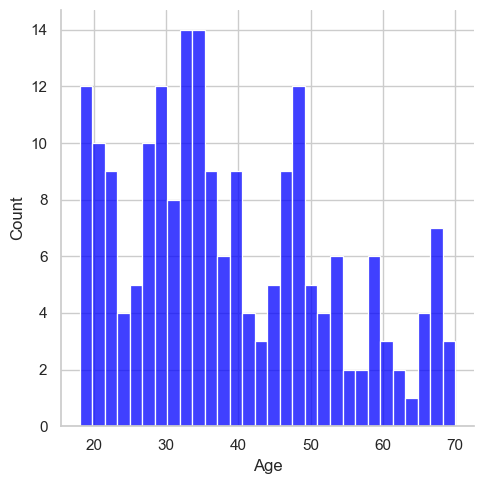

In [4]:
# checking distribution of Age 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.displot(df['Age'], bins=30, kde=False, color='blue')


## Which feature has the highest correlation with the 'Spending Score (1-100)' feature?

> The feature with the highest correlation with the 'Spending Score (1-100)' feature is 'Annual Income (k$)'. 
The correlation coefficient is highest with Annual Income (k$)

<Axes: >

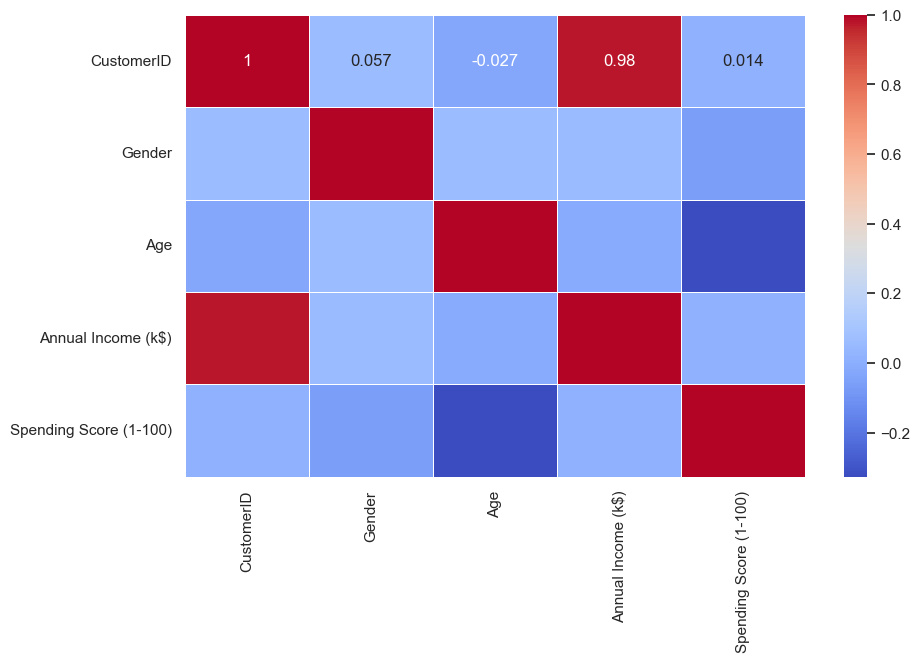

In [7]:
# checking for correlation of features with Spending Score (1-100)
# labelencode gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)

## What is the optimal number of clusters for customer segmentation according to the Elbow Method?
>> 2 clusters can be made for customer segmentation according to the Elbow Method.

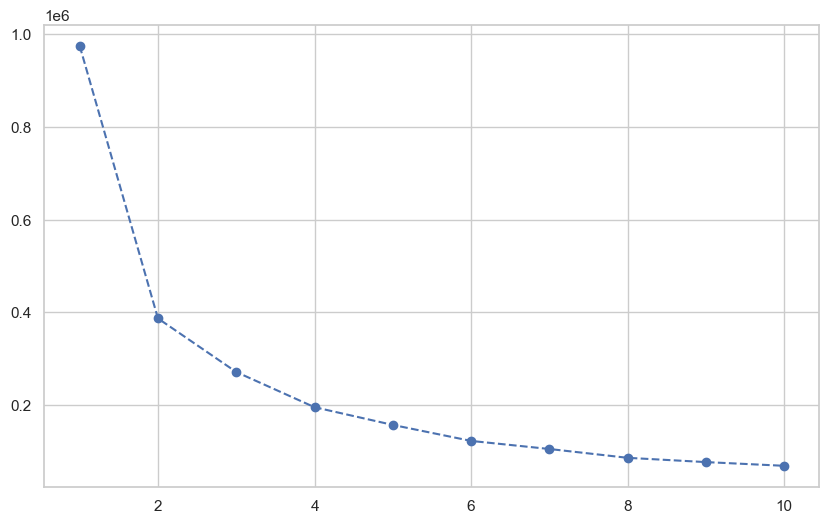

In [9]:
# checking for optimal number of clusters for customer segmentation using Elbow Method of kmeans
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')

## What is the average annual income of customers in the dataset?

Average Annual Income of Customers: 60.56


<Figure size 1000x600 with 0 Axes>

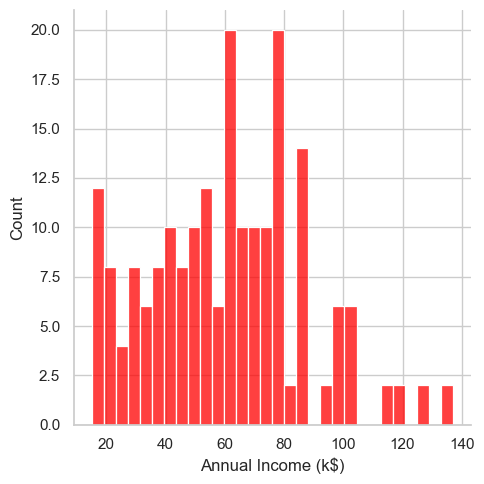

In [11]:
# average annual income of customers
plt.figure(figsize=(10,6))
sns.displot(df['Annual Income (k$)'], bins=30, kde=False, color='red')
print('Average Annual Income of Customers:', df['Annual Income (k$)'].mean())

## What is the average spending score of male customers in the dataset?

In [13]:
# average spending score of male customers
print('Average Spending Score of Male Customers')
print(df.groupby('Gender')['Spending Score (1-100)'].mean()[0])

Average Spending Score of Male Customers
51.526785714285715


## Which cluster has the highest average income and spending score?

In [18]:
# Create a new column called 'Cluster' using the KMeans function
df['Cluster'] = KMeans(n_clusters=3).fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Calculate the average income and spending score for each cluster
average_income = df.groupby('Cluster')['Annual Income (k$)'].mean()
average_spending_score = df.groupby('Cluster')['Spending Score (1-100)'].mean()

# Find the cluster with the highest average income and spending score
cluster_with_highest_income = average_income.idxmax()
cluster_with_highest_spending_score = average_spending_score.idxmax()

# Print the cluster with the highest average income and spending score
print(cluster_with_highest_income, cluster_with_highest_spending_score)

0 1


## What is the percentage of customers in Cluster 1?

In [19]:
cluster_1_count = df[df['Cluster'] == 0].shape[0]
total_count = df.shape[0]
percentage_cluster_1 = cluster_1_count / total_count * 100
print(percentage_cluster_1)

19.0


## What is the most frequent age group in Cluster 2?

In [20]:
cluster_2_age_counts = df[df['Cluster'] == 1]['Age'].value_counts()
most_frequent_age_group = cluster_2_age_counts.index[0]
print(most_frequent_age_group)

32


## What is the average income of customers in Cluster 3?

In [21]:
cluster_3_income = df[df['Cluster'] == 2]['Annual Income (k$)'].mean()
print(cluster_3_income)

44.15447154471545


## Show the count of value in each cluster.

In [22]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

Cluster
2    123
1     39
0     38
Name: count, dtype: int64


## Show customers from each cluster.

In [23]:
cluster_0_customers = df[df['Cluster'] == 0]
cluster_1_customers = df[df['Cluster'] == 1]
cluster_2_customers = df[df['Cluster'] == 2]
print(cluster_0_customers, cluster_1_customers, cluster_2_customers)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
124         125       0   23                  70                      29   
126         127       1   43                  71                      35   
128         129       1   59                  71                      11   
130         131       1   47                  71                       9   
132         133       0   25                  72                      34   
134         135       1   20                  73                       5   
136         137       0   44                  73                       7   
138         139       1   19                  74                      10   
140         141       0   57                  75                       5   
142         143       0   28                  76                      40   
144         145       1   25                  77                      12   
146         147       1   48                  77                      36   
148         

## Make a visualization of the clusters.

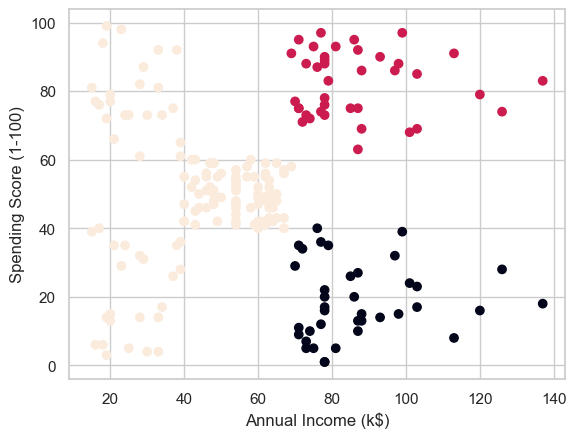

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Now Take the 3 features (["Age","Annual Income (k$)","Spending Score (1-100)"]) and repeat steps from 11 to 13.

In [30]:
df['Cluster'] = KMeans(n_clusters=3).fit_predict(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])


In [31]:
# 11. Count of values in each cluster:

cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)



Cluster
0    123
2     39
1     38
Name: count, dtype: int64


In [32]:

# 12. Customers from each cluster

cluster_0_customers = df[df['Cluster'] == 0]
cluster_1_customers = df[df['Cluster'] == 1]
cluster_2_customers = df[df['Cluster'] == 2]
print(cluster_0_customers, cluster_1_customers, cluster_2_customers)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
118         119       0   51                  67                      43   
119         120       0   50                  67                      57   
120         121       1   27                  67                      56   
121         122       0   38                  67                      40   
122         123       0   40                  69                      58   

     Cluster  
0          0  
1          0  
2          0  
3          0  
4          0

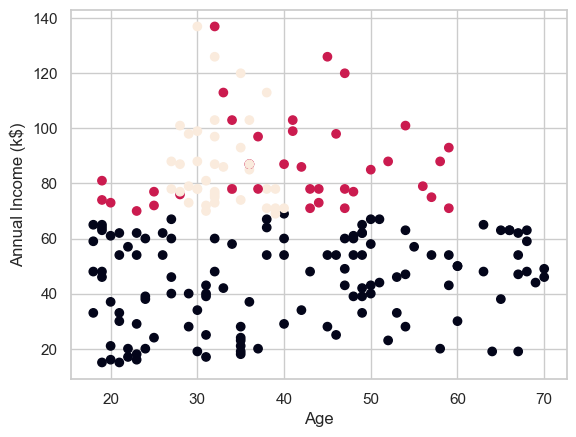

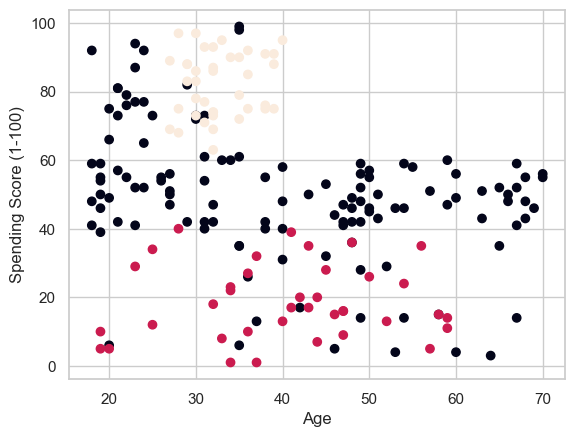

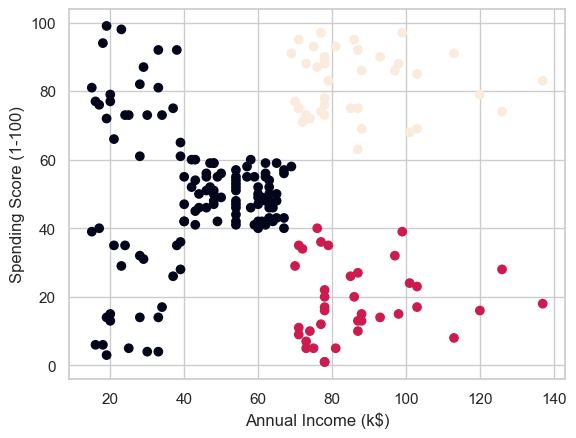

In [33]:
# 13. Visualization of the clusters

import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
